In [143]:
library(tidyverse)
library(ggrepel)

In [208]:
meta.dir <- '/media/pipkin/ROCKET-PRO/CD8_DEV_SC/9_Figures/9_Meta'

In [210]:
il2_stat5_promoted_df <- read_csv('/media/pipkin/ROCKET-PRO/CD8_DEV_SC/3_ChIP/4_DiffBind/2017_PNAS_Li_CD8-IL2_vs_CD8-noIL2_rpkmFoldChange_IL2promoted_annoDf.csv')
il2_stat5_promoted <- unique(il2_stat5_promoted_df$SYMBOL)

cp1 <- '/media/pipkin/ROCKET-PRO/CD8_DEV_SC/2_IL2RAKO_Nascent/2_DE/0_original_GN/WT_48h_vs_WT_24h_addGN.csv'
cp2 <- '/media/pipkin/ROCKET-PRO/CD8_DEV_SC/2_IL2RAKO_Nascent/2_DE/0_original_GN/WT_48h_vs_KO_48h_addGN.csv'

cp1.df <- read_csv(cp1) 
cp1.df <-  cp1.df %>% 
        filter(pvalue <= 0.05) %>% 
        select(one_of(c(colnames(cp1.df)[1], "log2FoldChange", "gene_name")))

cp2.df <- read_csv(cp2) 
cp2.df <- cp2.df %>% 
        filter(pvalue <= 0.05) %>%
        select(one_of(c(colnames(cp2.df)[1], "log2FoldChange")))
colnames(cp1.df) <- c("TranscriptID", "log2FC1", "gene_name")
colnames(cp2.df) <- c("TranscriptID", "log2FC2")


── Column specification ──────────────────────────────────────────────────────────────────
cols(
  seqnames = col_character(),
  start = col_double(),
  end = col_double(),
  width = col_double(),
  strand = col_character(),
  annotation = col_character(),
  geneChr = col_double(),
  geneStart = col_double(),
  geneEnd = col_double(),
  geneLength = col_double(),
  geneStrand = col_double(),
  geneId = col_double(),
  transcriptId = col_character(),
  distanceToTSS = col_double(),
  ENSEMBL = col_character(),
  SYMBOL = col_character(),
  GENENAME = col_character()
)



── Column specification ──────────────────────────────────────────────────────────────────
cols(
  `Unnamed: 0` = col_character(),
  baseMean = col_double(),
  log2FoldChange = col_double(),
  lfcSE = col_double(),
  stat = col_double(),
  pvalue = col_double(),
  padj = col_double(),
  gene_name = col_character()
)



── Column specification ──────────────────────────────────────────────────────────────────
cols(
  `U

In [211]:
scatter.df <- cp1.df %>% left_join(cp2.df, by="TranscriptID")
scatter.df$Highlight <- ifelse(scatter.df$gene_name %in% il2_stat5_promoted, "Yes", "No")

In [213]:
# Annotate selected genes
anno.genes <- c("Tcf7", "Chd7", "Aff3", "Batf3", "Runx3")
scatter.anno.df <- scatter.df %>% filter(gene_name %in% anno.genes)
# For each gene, highlight not more than 2 transcripts
use.vec <- c()
for (i in c(1:nrow(scatter.anno.df))){
    sum_i <- table(scatter.anno.df$gene_name[1:i])
    if (sum_i[scatter.anno.df$gene_name[i]] < 2){
        use.vec <- c(use.vec, "use")
    } else {
        use.vec <- c(use.vec, "no")
    }
}
scatter.anno.df <- scatter.anno.df %>% filter(use.vec == "use")

Warning message:
“Removed 17832 rows containing missing values (geom_point).”


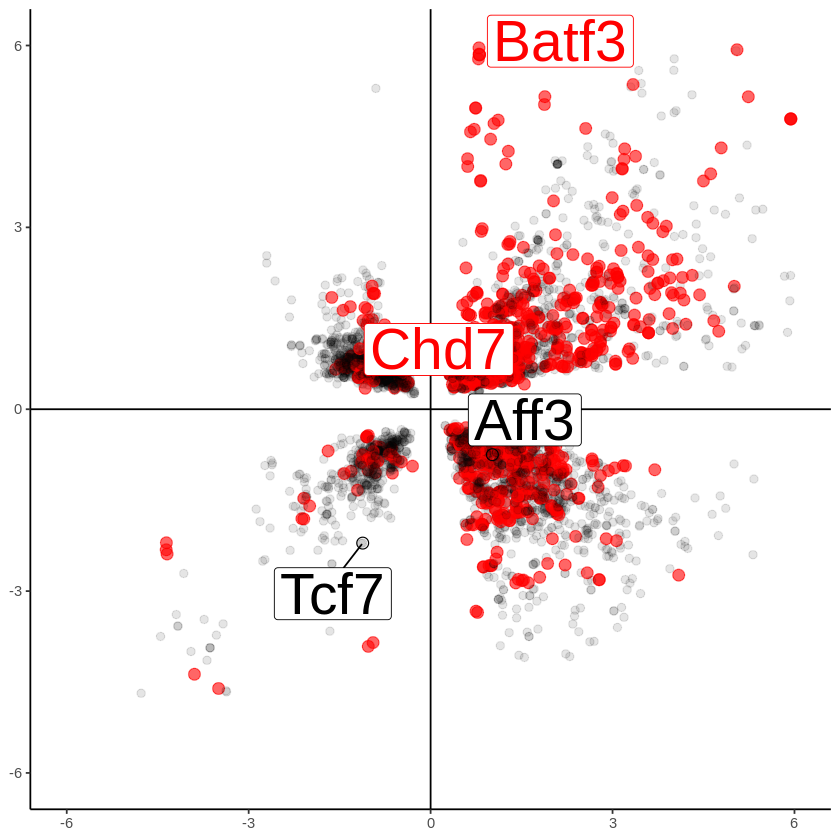

In [225]:
scatter.plot <- ggplot(scatter.df, aes(x=log2FC1, y=log2FC2, color=Highlight, alpha=Highlight, size=Highlight)) +
    geom_point() + 
    scale_color_manual(values=c( "black", "red")) +
    scale_alpha_manual(values=c(0.1, 0.6)) +
    scale_size_manual(values=c(2,3)) +
    
    xlim(c(-6, 6)) + ylim(c(-6,6)) +
    geom_vline(xintercept=0) +
    geom_hline(yintercept=0) +
    
    geom_label_repel(data=scatter.anno.df, size=12, alpha=1, force=80, max.iter=100000,
                          aes(x=log2FC1, y=log2FC2, label=gene_name)) +
    geom_point(data=scatter.anno.df, 
               aes(x=log2FC1, y=log2FC2), pch=1, size=3, alpha=1) +
    
    theme(axis.line = element_line(colour = "black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_blank(),
    panel.background = element_blank(),
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
    legend.position = "none")
scatter.plot

In [223]:
out.plot.name <- file.path(meta.dir, "Nascent_IL2dependent_ChIP_scatter.png")
out.csv.name <- file.path(meta.dir, "Nascent_IL2dependent_ChIP_scatter.csv")
ggsave(out.plot.name, scatter.plot)
write.csv(scatter.df, out.csv.name)

Saving 6.67 x 6.67 in image

Warning message:
“Removed 17832 rows containing missing values (geom_point).”


In [236]:
il2.direct.promote <- scatter.df %>% filter(log2FC1 > 0) %>% filter(log2FC2 > 0) %>% filter(Highlight == "Yes")
il2.direct.promote <- unique(il2.direct.promote$gene_name)
il2.direct.promote.df <- data.frame(il2.direct.promote )
write.csv(il2.direct.promote.df, "Il2_direct_promote.csv")

il2.direct.promote
<fct>
Arid5a
Il18r1
Ctla4
Icos
Selp
Cd48
Ptpn14
Batf3
Il2ra


In [137]:
scatter.df %>% filter(log2FC1 >0) %>% filter(log2FC2>0) %>% .$Label %>% table(.)

.
 No Yes 
989 574 

In [138]:
scatter.df %>% filter(log2FC1 >0) %>% filter(log2FC2<0) %>% .$Label %>% table(.)

.
  No  Yes 
1157  317 

In [139]:
scatter.df %>% filter(log2FC1 <0) %>% filter(log2FC2>0) %>% .$Label %>% table(.)

.
  No  Yes 
1430  110 

In [140]:
scatter.df %>% filter(log2FC1 <0) %>% filter(log2FC2<0) %>% .$Label %>% table(.)

.
 No Yes 
501  42 

TranscriptID,log2FC1,gene_name,log2FC2,Highlight
<chr>,<dbl>,<chr>,<dbl>,<chr>
ENSMUSE00000863721,1.5822952,Rb1cc1,NA,No
ENSMUSE00000230531,1.2620075,Rb1cc1,NA,No
ENSMUSE00000997941,1.1398452,Rb1cc1,NA,No
ENSMUSE00000154068,1.1795139,Rb1cc1,NA,No
ENSMUSE00000848395,1.3284582,Rb1cc1,NA,No
ENSMUSE00001276978,1.2350165,Rb1cc1,NA,No
ENSMUSE00000858689,0.9958728,Rb1cc1,NA,No
ENSMUSE00000850861,1.2120339,Rb1cc1,NA,No
ENSMUSE00000854166,1.2484275,Rb1cc1,NA,No
